# Cluster Project - Zillow Analysis

Name: Craig Calzado

<h2>Goals</h2>

- Determine drivers of error in the Zillow dataset logerror(Zestimate).
    - logerror(Zestimate) is the difference between the actual value of the property and the estimated value of the property.

- Create a model that improves prediction of logerror(Zestimate).


<h2>Executive Summary</h2>

- There were six drivers for error in the zillow zestimate.
    - age_in_years
    - total_rooms
    - dollars_per_sqft
    - calculatedfinishedsquarefeet
    - cluster1('age_in_years' vs. 'dollars_per_sqft')
    - cluster2('total_rooms' vs. 'calculatedfinishedsquarefeet')

- Modeling 
    - 3rd degree Polynomial Regression model performed best with 1% improvement over the baseline.


<h2>Imports</h2>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures

import wrangle

<h2>Data Acquisition/Wrangle</h2>

- pulled all tables from the database
- aproximatly 77,381 rows of data
- ensured no duplicates based on parcelid and trasaction date

In [2]:
zillow_data = wrangle.get_zillow17_data()

Let me get that for you...


In [3]:
zillow_data.shape

(77381, 69)

<h2>Data Preparation</h2>

- Home types include 'Single Family', 'Mobile', 'Manufactured', 'Townhouse', 'Cluster', and 'Condominium' 

- outliers were removed from 'calculatedfinishedsquarefeet', 'bedroomcnt', and 'bathroomcnt'

- missing values were handled by removing all columns and rows that had more than 50% missing values.

- Columns dropped were 'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc', 'Unnamed: 0'

- impute missing values useing the most frequent value in 'calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', and 'censustractandblock'.

- impute missing values using median in 'finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', and 'taxamount'.

- created county column using fips

- only select properties with atleast 1 bedroom, 1 bathroom, and 500 sqft

- 67665 rows of data 27 columns

- 13% data loss...acceptable

In [4]:
zillow = wrangle.prepare_zillow(zillow_data)

In [5]:
zillow.shape

(67665, 27)

<h2>Feature Engineering</h2>

- created new columns for sqft per bed and bath
- new column beds + baths = total rooms
- created new column for sqft per room
- created new column for age of property
- created new column for tax rate
- created new column for tax amount per sqft
- added 7 new columns for exploration

In [6]:
# feature engineering
zillow = wrangle.feature_engineering(zillow)

In [7]:
zillow.shape

(67665, 34)

<h2>Investigate with Questions</h2>
Target Variable: logerror

Initial Questions:
- What is the distribution of each variable?
- Does the logerror differ by home age?
- Does the logerror differ by tax rate?
- Does the logerror differ by tax amount per sqft?
- Does the logerror differ by location?
- Is there a relationship between the logerror and amount of rooms?
- Is there a relationship between the logerror and age of property?
- Is there a relationship between the logerror and tax rate?
- If we control for age, does the logerror differ by location?
- If we control for tax rate, does the logerror differ by location?
- If we control for cost per sqft, does the logerror differ by location?
- If we control for location, does the logerror differ by age?
- If we control for location, does the logerror differ by tax rate?

<h2>The Split</h2>

- Train 37,892 rows of data
- Validate 16240 rows of data
- Test 13522 rows of data
- Same is observed for the X, y splits

In [8]:
# split data
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_zillow(zillow, 'logerror')

In [9]:
# check splits
print(train.shape)
print(validate.shape)
print(test.shape)

(37892, 34)
(16240, 34)
(13533, 34)


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(37892, 33)
(37892, 1)
(16240, 33)
(16240, 1)
(13533, 33)
(13533, 1)


<h2>Scale Data</h2>

- Data was split into train(75%), validate(15%), and test(10%)
- Target(y) varible is 'logerror'
- Features(X) are all except 'logerror'
- All shapes are valid
- Selected features to scale and scaled Xs'

In [11]:
# numerical columns to scale
num_cols = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fullbathcnt', 'latitude',
       'longitude', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'taxamount','sqft_per_bed', 'sqft_per_bath',
       'total_rooms', 'bed_bath_rooms_per_sqft', 'age_in_years', 'taxrate',
       'dollars_per_sqft']


In [12]:
X_train = X_train[num_cols]
X_validate = X_validate[num_cols]
X_test = X_test[num_cols]
X_train_scaled = wrangle.scale_minmax(X_train)
X_validate_scaled = wrangle.scale_minmax(X_validate)
X_test_scaled = wrangle.scale_minmax(X_test)

In [13]:
print(X_train_scaled.shape)
print(X_validate_scaled.shape)
print(X_test_scaled.shape)

(37892, 20)
(16240, 20)
(13533, 20)


<h2>Exploration</h2>

<Figure size 144x72 with 0 Axes>

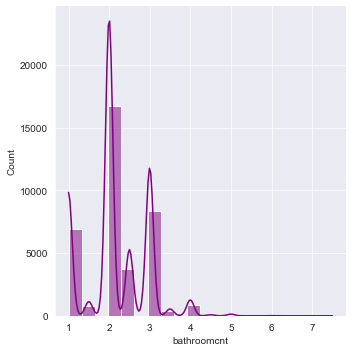

<Figure size 144x72 with 0 Axes>

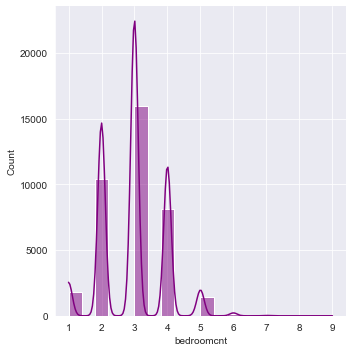

<Figure size 144x72 with 0 Axes>

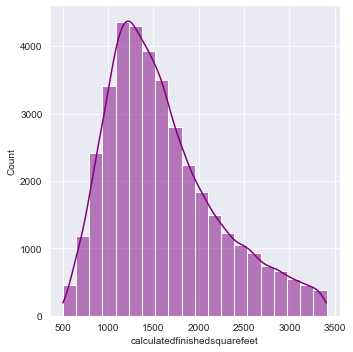

<Figure size 144x72 with 0 Axes>

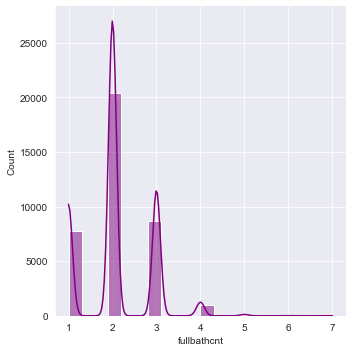

<Figure size 144x72 with 0 Axes>

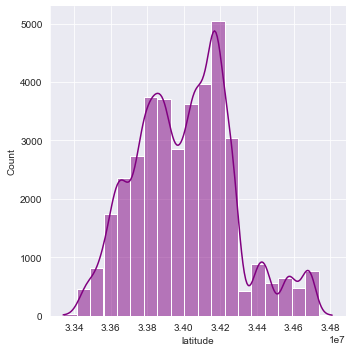

<Figure size 144x72 with 0 Axes>

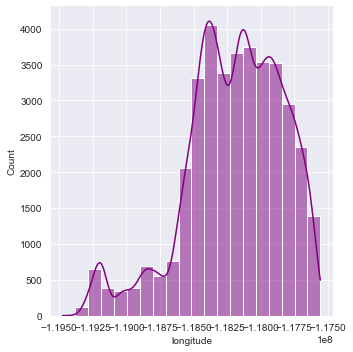

<Figure size 144x72 with 0 Axes>

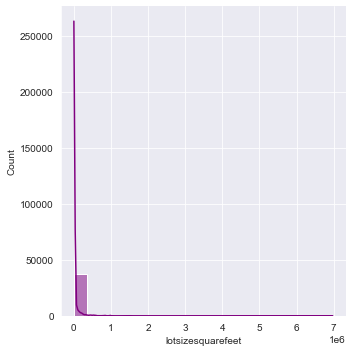

<Figure size 144x72 with 0 Axes>

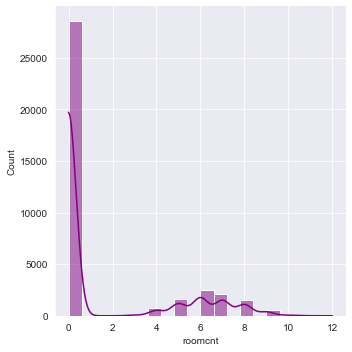

<Figure size 144x72 with 0 Axes>

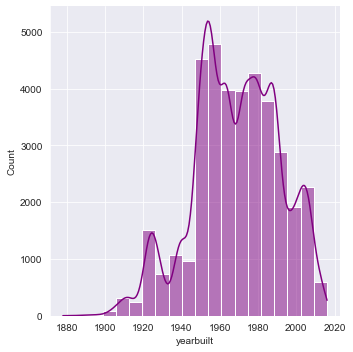

<Figure size 144x72 with 0 Axes>

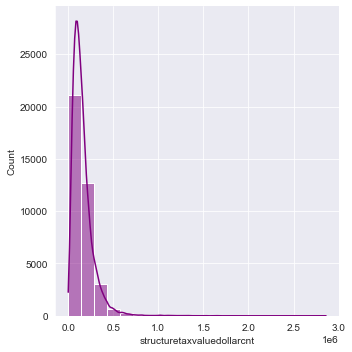

<Figure size 144x72 with 0 Axes>

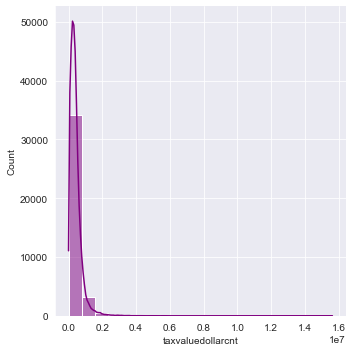

<Figure size 144x72 with 0 Axes>

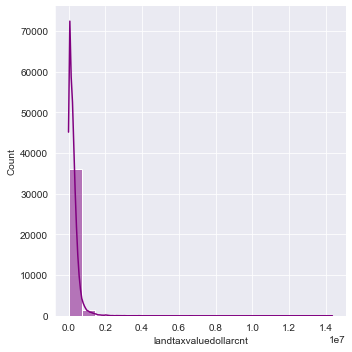

<Figure size 144x72 with 0 Axes>

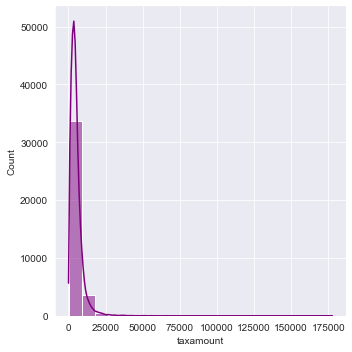

<Figure size 144x72 with 0 Axes>

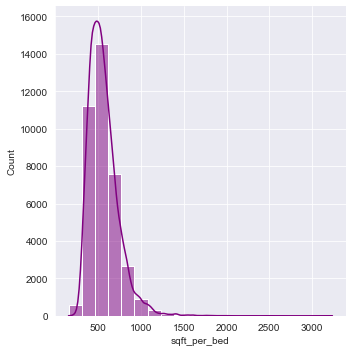

<Figure size 144x72 with 0 Axes>

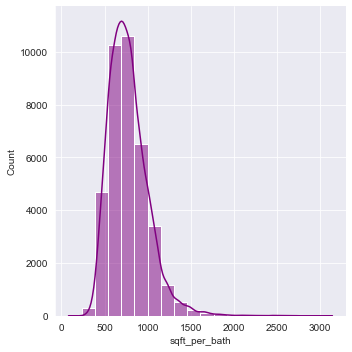

<Figure size 144x72 with 0 Axes>

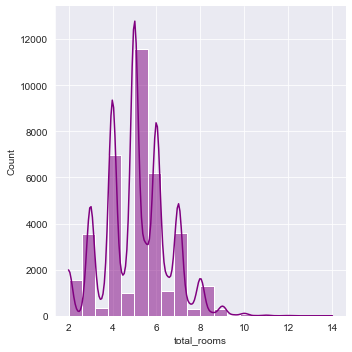

<Figure size 144x72 with 0 Axes>

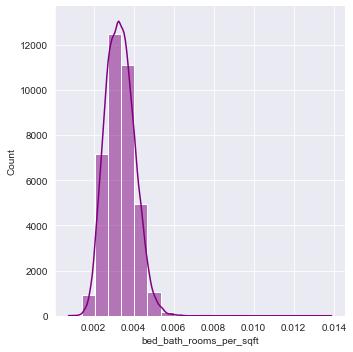

<Figure size 144x72 with 0 Axes>

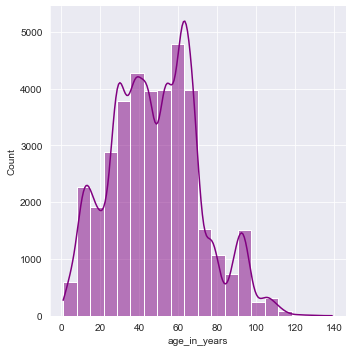

<Figure size 144x72 with 0 Axes>

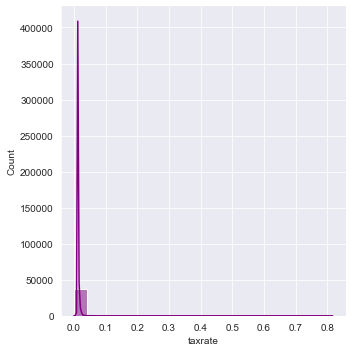

<Figure size 144x72 with 0 Axes>

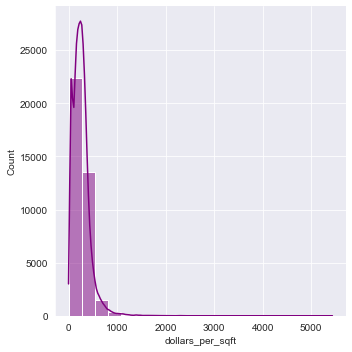

In [14]:
# check the distribution of each variable thats is not and object or str
for col in X_train.columns:
    if X_train[col].dtype != 'object' and X_train[col].dtype != 'str':
        sns.set_style("darkgrid")
        plt.figure(figsize=(2,1))
        sns.displot(X_train[col], bins=20, kde=True, color='purple')

Take Aways:
- Calculatedsquarefeet has a normal distribution
- Skew right = dollars_per_sqft, age_in_year, total_rooms, sqft_per_bath, sqft_per_room, latitude: (use spearmans correlation test in linear relationships)
- Skew left = longitude and year_built

<Figure size 288x144 with 0 Axes>

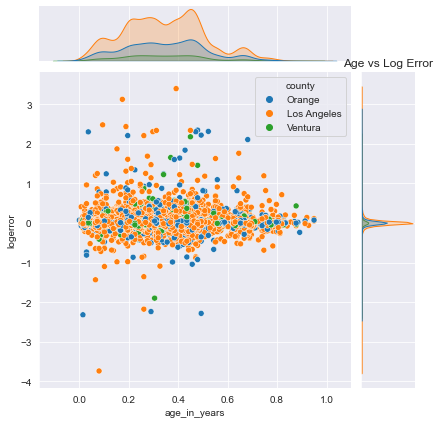

<Figure size 288x144 with 0 Axes>

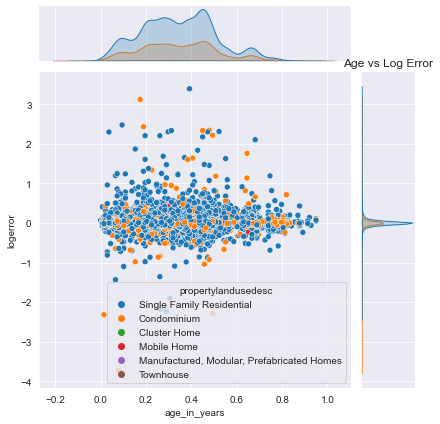

In [15]:
# Does the logerror differ by home age? 
# plot age_in_years vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['age_in_years'], y='logerror', data=train, hue='county')
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()
# witha hue for house types
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['age_in_years'], y=y_train['logerror'], data=train, hue='propertylandusedesc')
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()

Statistical testing:

    H0: There is no relationship between logerror and age_in_years

    Ha: There is a relationship between logerror and age_in_years

In [16]:
# use spearman's test statical analysis to compare the correlation between the variables
# due to relationship between age and logerror being non-linear relationship
r, p = stats.spearmanr(train['age_in_years'], train['logerror'])
print('Pearson\'s r:', r)
print('p-value:', p)

Pearson's r: -0.021699560767899768
p-value: 2.396146178325021e-05


In [17]:
# set alpha to 0.05
alpha = 0.05

if p > alpha:
    print('There is no significant relationship between age and logerror')
else:
    print('There is a relationship between age and logerror')

There is a relationship between age and logerror


Take Aways:
- There appears to be relationship between logerror and age_in_years.
- visual inspection of the data shows that older homes have less error.
- visual inspection of the data shows that condominums and single family homes have more error.

<Figure size 288x144 with 0 Axes>

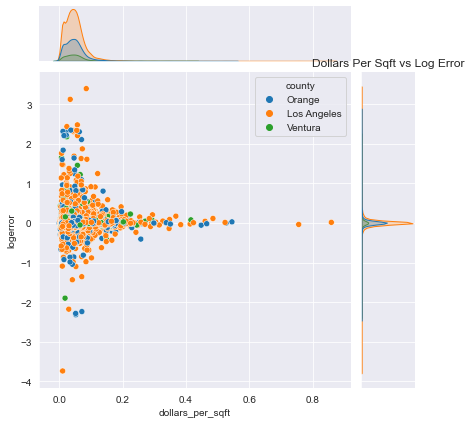

In [18]:
# Does the logerror differ by cost per sqft?
# plot dollars_per_sqft vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['dollars_per_sqft'], y=y_train['logerror'], data=train, hue='county')
# lable the plot
plt.xlabel('Dollars Per Sqft')
plt.ylabel('Log Error')
plt.title('Dollars Per Sqft vs Log Error')
plt.show()

In [19]:
# Conduct statistical tests to compare the correlation between the variables
r,p = stats.pearsonr(X_train_scaled['dollars_per_sqft'], y_train['logerror'])
print('Pearson\'s r:', r)
print('p-value:', p)

Pearson's r: -0.04621516155386419
p-value: 2.242945014295478e-19


In [20]:
alpha = 0.05

if p > alpha:
    print('There is not a correlation between tax rate and logerror')
else:
    print('There is a correlation between tax rate and logerror')

There is a correlation between tax rate and logerror


Take Away:
- There appears to be a relationship between taxrate and logerror.
- The less you pay per sqft the higher the chance of increasing the logerror.

<Figure size 288x144 with 0 Axes>

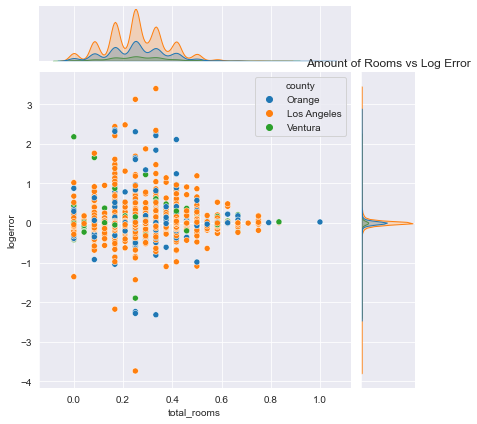

<Figure size 288x144 with 0 Axes>

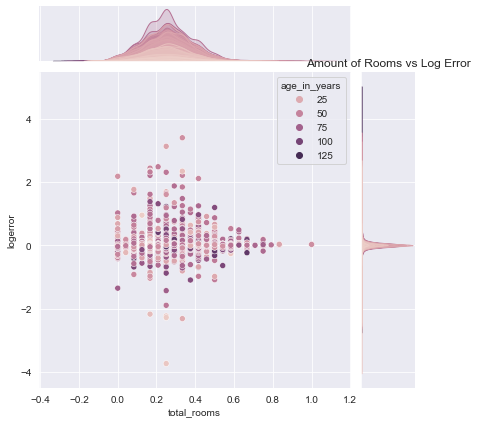

In [21]:
# Is there a relationship between the logerror and amount of rooms?
# plot amount_of_rooms vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['total_rooms'], y=y_train['logerror'], data=train, hue='county')
# lable the plot
plt.xlabel('Amount of Rooms')
plt.ylabel('Log Error')
plt.title('Amount of Rooms vs Log Error')
plt.show()
# with a hue for house types
# plot amount_of_rooms vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['total_rooms'], y=y_train['logerror'], data=X_train, hue='age_in_years')
# lable the plot
plt.xlabel('Amount of Rooms')
plt.ylabel('Log Error')
plt.title('Amount of Rooms vs Log Error')
plt.show()

In [22]:
# Conduct statistical tests to compare the correlation between the variables
# run a pearsonr to compare logerror and total_rooms
r,p = stats.spearmanr(train.total_rooms, train.logerror)
print('Spearman\'s r:', r)
print('p-value:', p)

Spearman's r: 0.04982555565824926
p-value: 2.879664514289537e-22


In [23]:
if p > alpha:
    print('There is not a correlation between total_rooms and logerror')
else:
    print('There is a correlation between total_rooms and logerror')

There is a correlation between total_rooms and logerror


Take aways:
- There appears to be a relationship between totalrooms and logerror.
- property with less rooms have a higher chance of increasing the logerror.

<h2>Cluster Analysis</h2>

Identify other probable drivers of logerror

Features: age_in_years, total_rooms, dollars_per_sqft, calculatedfinishedsquarefeet

Cluster1 = age_in_years vs dollars_per_sqft

In [24]:
# X is the features you want to use to cluster
# apply feature to train, validate, and test
X1 = X_train_scaled[['age_in_years', 'dollars_per_sqft']]
X2 = X_validate_scaled[['age_in_years', 'dollars_per_sqft']]
X3 = X_test_scaled[['age_in_years', 'dollars_per_sqft']]

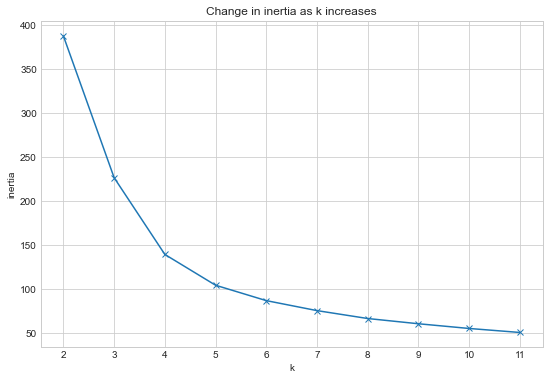

In [25]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [26]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=789)
kmeans.fit(X1)
kmeans.fit(X2)
kmeans.fit(X3)


kmeans.predict(X1)
kmeans.predict(X2)
kmeans.predict(X3)

array([2, 2, 2, ..., 0, 0, 1], dtype=int32)

In [27]:
# Add a column to the scaled dataframe called cluster
X_train_scaled['cluster1'] = kmeans.predict(X1)
X_validate_scaled['cluster1'] = kmeans.predict(X2)
X_test_scaled['cluster1'] = kmeans.predict(X3)

Cluster Hyphothesis testing

H0: There is no relationship between cluster1 and logerror

H1: There is a relationship between cluster1 and logerror

In [28]:
# run pearsonr test to check if there is a correlation between the two variables
r, p = stats.spearmanr(X_train_scaled['cluster1'], y_train['logerror'])
print(r,p)

-0.004829903856849317 0.3471369548430633


In [29]:
if p < 0.05:
    print('There is a relationship between cluster1 and logerror')
else:
    print('There is no relationship between cluster1 and logerror')

There is no relationship between cluster1 and logerror


cluster2 = total_rooms vs calculatedfinishedsquarefeet

In [30]:
X1 = X_train_scaled[['total_rooms', 'calculatedfinishedsquarefeet']]
X2 = X_validate_scaled[['total_rooms', 'calculatedfinishedsquarefeet']]
X3 = X_test_scaled[['total_rooms', 'calculatedfinishedsquarefeet']]

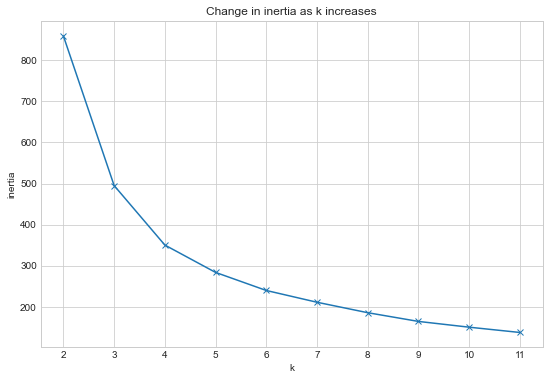

In [31]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [32]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=789)
kmeans.fit(X1)
kmeans.fit(X2)
kmeans.fit(X3)

kmeans.predict(X1)
kmeans.predict(X2)
kmeans.predict(X3)


array([1, 1, 2, ..., 1, 3, 1], dtype=int32)

In [33]:
# Add a column to the dataframe called cluster
X_train_scaled['cluster2'] = kmeans.predict(X1)
X_validate_scaled['cluster2'] = kmeans.predict(X2)
X_test_scaled['cluster2'] = kmeans.predict(X3)

In [34]:
# run pearsonr test to check if there is a correlation between the two variables
r, p = stats.spearmanr(X_train_scaled['cluster2'], y_train['logerror'])
print(r,p)

-0.028660719835323586 2.404910629358693e-08


In [35]:
if p < 0.05:
    print('There is a relationship between cluster2 and logerror')
else:
    print('There is no relationship between cluster2 and logerror')

There is a relationship between cluster2 and logerror


Take aways:
- Four distinct groups for total rooms and calculatedfinishedsquarefeet
- Total rooms appears to decrease as the cost per sqft increases.
- Stat test shows that there is no relationship between total rooms and logerror.

cluster3 = age_in_years vs total_rooms

In [36]:
X1 = X_train_scaled[['age_in_years', 'total_rooms']]
X2 = X_validate_scaled[['age_in_years', 'total_rooms']]
X3 = X_test_scaled[['age_in_years', 'total_rooms']]

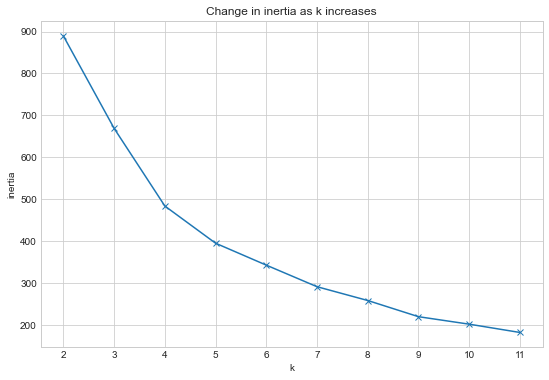

In [37]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [38]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=789)
kmeans.fit(X1)
kmeans.fit(X2)
kmeans.fit(X3)

kmeans.predict(X1)
kmeans.predict(X2)
kmeans.predict(X3)

array([1, 1, 1, ..., 2, 2, 3], dtype=int32)

In [39]:
X_train_scaled['cluster3'] = kmeans.predict(X1)
X_validate_scaled['cluster3'] = kmeans.predict(X2)
X_test_scaled['cluster3'] = kmeans.predict(X3)


In [40]:
# run pearsonr test to check if there is a correlation between the two variables
r, p = stats.spearmanr(X_train_scaled['cluster3'], y_train['logerror'])
print(r,p)

-0.026827419280235878 1.7608773360315386e-07


In [41]:
if p < 0.05:
    print('There is a relationship between cluster3 and logerror')
else:
    print('There is no relationship between cluster3 and logerror')

There is a relationship between cluster3 and logerror


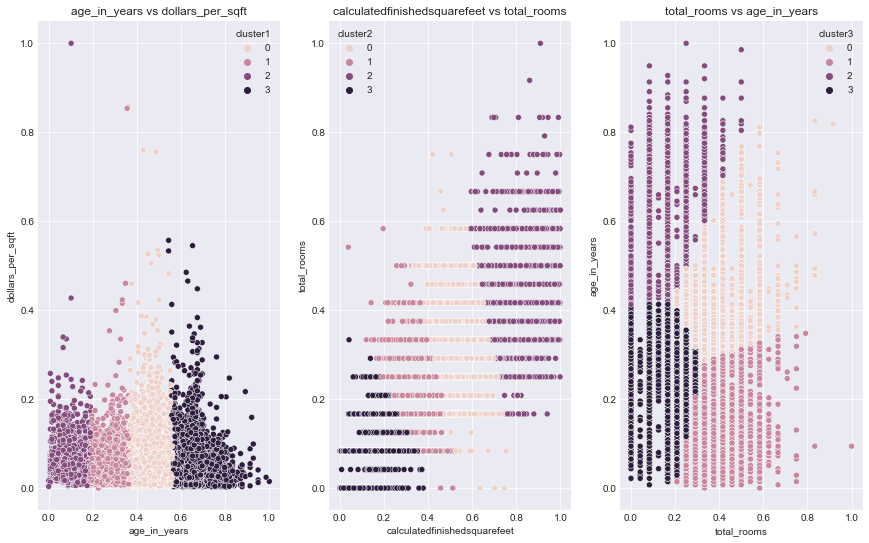

In [42]:

# create three subplots with original data, actual, and cluster assignments
with plt.style.context('seaborn-darkgrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 4, 1)
    sns.scatterplot(x='age_in_years', y='dollars_per_sqft', hue='cluster1', data=X_train_scaled)
    plt.title('age_in_years vs dollars_per_sqft')
    plt.subplot(1, 4, 2)
    sns.scatterplot(x='calculatedfinishedsquarefeet', y='total_rooms', hue='cluster2', data=X_train_scaled)
    plt.title('calculatedfinishedsquarefeet vs total_rooms')
    plt.subplot(1, 4, 3)
    sns.scatterplot(x='total_rooms', y='age_in_years', hue='cluster3', data=X_train_scaled)
    plt.title('total_rooms vs age_in_years')

Take aways:

- Cluster1 has no relationship with logerror
- Cluster2 has relationship with logerror
- Cluster3 has relationship with logerror

<h2>Modeling</h2>

In [43]:
# set logerror baseline for modeling
baseline = y_train['logerror'].mean()
baseline

0.014528110960473068

In [44]:
# create a column in the dataframe called baseline
y_train['baseline'] = baseline

In [45]:
# calculate to RMSE for the baseline
train_baseline_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['baseline']))


In [46]:
# predict validate data set
y_validate['baseline'] = baseline
validate_baseline_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['baseline']))

In [47]:
# create a dataframe to visualize the results
results = pd.DataFrame(data=[{'model': 'baseline_mean', 'train_rmse': train_baseline_rmse, 'validate_rmse': validate_baseline_rmse}])
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.15916


In [48]:
# Select features to use for modeling
features = ['age_in_years', 'total_rooms', 'dollars_per_sqft', 'cluster2', 'cluster3']
unscaled_features = ['age_in_years', 'total_rooms', 'dollars_per_sqft']

<h3>Model 1: Linear Regression (OLS)</h3>

In [49]:
# create the model
model1 = LinearRegression(normalize=True)
# fit the model
model1.fit(X_train_scaled[features], y_train.logerror)
# predict training data
y_train['logerror_pred1']= model1.predict(X_train_scaled[features])
# evaluate train
train_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred1']))
# predict validate data set
y_validate['logerror_pred1']= model1.predict(X_validate_scaled[features])
# evaluate validate
validate_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred1']))

In [50]:
# create a dataframe to visualize the results
results = results.append({'model': 'linear_regression', 'train_rmse': train_rmse, 'validate_rmse': validate_rmse}, ignore_index=True)
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160991,0.159092


<h3>Model 2: Lasso + Lars</h3>

In [51]:
# create the model
model2 = LassoLars(alpha=2)
# fit the model
model2.fit(X_train_scaled[features], y_train.logerror)
# predict training data
y_train['logerror_pred2']= model2.predict(X_train_scaled[features])
# evaluate train
train_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred2']))
# predict validate data set
y_validate['logerror_pred2']= model2.predict(X_validate_scaled[features])
# evaluate validate
validate_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred2']))


In [52]:
# create a dataframe to visualize the results
results = results.append({'model': 'lasso_lars', 'train_rmse': train_rmse, 'validate_rmse': validate_rmse}, ignore_index=True)
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160991,0.159092
2,lasso_lars,0.161223,0.159160


<h3>model 3: polynomial features degree 3</h3>

In [53]:
# create the model
model3 = PolynomialFeatures(degree=3)
# fit and transform the model for train
X_train_poly = model3.fit_transform(X_train_scaled[features])
# fit and transform the model for validate
X_validate_poly = model3.fit_transform(X_validate_scaled[features])
# create a linear regression model
lm = LinearRegression(normalize=True)
# fit the model
lm.fit(X_train_poly, y_train.logerror)
# use the model
y_train['logerror_pred_lm']= lm.predict(X_train_poly)
# evaluate rmse for train
model3_rmse_train = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred_lm']))
# predict validate data set
y_validate['logerror_pred_lm']= lm.predict(X_validate_poly)
# evaluate rmse for validate
model3_rmse_validate = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred_lm']))

In [54]:
results = results.append({'model': 'polynomial_regression', 'train_rmse': model3_rmse_train, 'validate_rmse': model3_rmse_validate}, ignore_index=True)
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160991,0.159092
2,lasso_lars,0.161223,0.159160
3,polynomial_regression,0.160404,0.159257


<h3>model4 = Unscaled Lasso + Lars no clusters</h3>

In [55]:
# create the model
model2 = LassoLars(alpha=2)
# fit the model
model2.fit(X_train[unscaled_features], y_train.logerror)
# predict training data
y_train['logerror_pred2']= model2.predict(X_train[unscaled_features])
# evaluate train
train_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred2']))
# predict validate data set
y_validate['logerror_pred2']= model2.predict(X_validate[unscaled_features])
# evaluate validate
validate_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred2']))


In [56]:
# create a dataframe to visualize the results
results = results.append({'model': 'unscaled lasso_lars', 'train_rmse': train_rmse, 'validate_rmse': validate_rmse}, ignore_index=True)
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160991,0.159092
2,lasso_lars,0.161223,0.159160
3,polynomial_regression,0.160404,0.159257
4,unscaled lasso_lars,0.161223,0.159160


<h3>Test Best Model</h3>

In [57]:
# Use the best model on test set
X_test_poly = X_test_scaled[features]
X_test_3 = model3.transform(X_test_poly)
# predict test data
y_test['poly_pred_lm']= lm.predict(X_test_3)
# evaluate rmse for test
poly_rmse_test = np.sqrt(mean_squared_error(y_test.logerror, y_test['poly_pred_lm']))
poly_rmse_test

0.16113153559995427

In [58]:
# percentage of test data that is predicted correctly
percent_improved = (train_baseline_rmse - poly_rmse_test) / train_baseline_rmse * 100
percent_improved

0.05666664766077337

Take aways:

- Polynomial features degree 3 performed best with .05% improvement over the baseline.
- removed clusters and ran lasso and lars on the unscaled data preformed the same as baseline.
- OLS performed the second best on train data.

<h2>Final Takeaways</h2>

-  The 3rd Degree Polynomial Regression performed best with .05% improvement over the baseline.
-  Two of the three cluster had a relationship with logerror.
-  The real estate market is very volatile. This could be due to outside factors such as economic conditions, supply chain, and the demand for real estate.
-  The drivers of logerror i was able to identify with the given data is 'age_in_years', 'total_rooms', 'dollars_per_sqft', 'cluster2'(sqft vs. total_rooms), 'cluster3'(age vs. total_rooms).

<h5>With more time:</h5>

- I would like to explore the relationship between the logerror and other variables.
- I would like to see if there is a relationship between the logerror and the location of the property.
- I would like to improve clustering by using more features.